In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from tqdm import tqdm

In [2]:
data = pd.read_csv('Documentation/lab2_data.csv')

data_2 = pd.DataFrame(columns = ["Vehicle type", "Observed time", "Mean speed", "Accel time", "Decel time", "Idle time", "Cruise time"])

time_increment = 0.4

for _ID in tqdm(range(1,data["Vehicle_ID"].iloc[-1])):

    data_ID = data.loc[data["Vehicle_ID"] == _ID].reset_index() #Extract the rows with the ID
    measurement_lenght_ID = len(data_ID["Vehicle_ID"])
    speeds_ID = []
    accelerations_ID = []
    for i in range(measurement_lenght_ID - 1):
        speed_i_ID = (data_ID["Cumulative_distance"].iloc[i+1] - data_ID["Cumulative_distance"].iloc[i]) / time_increment
        if i < measurement_lenght_ID - 2:
            acceleration_i_ID = data_ID["Cumulative_distance"].iloc[i+2] - 2 * data_ID["Cumulative_distance"].iloc[i+1] + data_ID["Cumulative_distance"].iloc[i]
        speeds_ID.append(speed_i_ID)
        accelerations_ID.append(acceleration_i_ID)
    
    vehicle_type_ID = data_ID["Vehicle_type"].iloc[0]

    observed_time_ID = (len(data_ID["Time"]) - 1) * time_increment

    mean_speed_ID = sum(speeds_ID)/len(speeds_ID)

    accel_time_ID = 0
    decel_time_ID = 0
    for accel_at_t in accelerations_ID:
        if accel_at_t < -0.5:
            decel_time_ID += time_increment
        elif accel_at_t > 0.5:
            accel_time_ID += time_increment
        else:
            pass

    idle_time_ID = 0
    cruise_time_ID = 0
    for speed_at_t in speeds_ID:
        if speed_at_t < 0.28:
            idle_time_ID += time_increment
        else:
            cruise_time_ID += time_increment

    data_2.loc[_ID] = [vehicle_type_ID, observed_time_ID, mean_speed_ID, accel_time_ID, decel_time_ID, idle_time_ID, cruise_time_ID]

data_2


100%|██████████| 2476/2476 [00:32<00:00, 76.57it/s] 


,Vehicle type,Observed time,Mean speed,Accel time,Decel time,Idle time,Cruise time
1,Motorcycle,65.6,1.969771,1.2,0.4,45.6,20.0
2,Car,32.0,6.759500,0.8,0.0,2.8,29.2
3,Car,39.2,5.688648,0.0,0.0,0.0,39.2
4,Motorcycle,99.2,1.469768,0.4,0.0,75.2,24.0
5,Motorcycle,93.6,2.374487,1.6,1.6,76.4,17.2
...,...,...,...,...,...,...,...
2472,Car,2.0,9.972000,0.0,0.8,0.0,2.0
2473,Car,2.0,7.357500,0.8,0.0,0.0,2.0
2474,Motorcycle,2.0,8.410000,0.0,0.0,0.0,2.0
2475,Motorcycle,2.0,11.352500,0.0,0.0,0.0,2.0


In [3]:
vehicle_types = ["Motorcycle", "Car", "Heavy Vehicle"]

data_per_vehicles = pd.DataFrame(columns = ["Average speed", "Acceleration time", "Deceleration time", "Cruise time", "Idle time"])

for vehicle_type in vehicle_types:
    
    data_vehicle_type = data_2.loc[data_2["Vehicle type"] == vehicle_type].reset_index()
    data_vehicle_type["Mean speed times observed time"] = data_vehicle_type["Observed time"] * data_vehicle_type["Mean speed"]

    total_time = data_vehicle_type["Observed time"].sum()

    mean_speed = data_vehicle_type["Mean speed times observed time"].sum() / total_time



## Question 2

283321.854669143
924.472413
306.4686957501922


Car              1618
Motorcycle        763
Heavy Vehicle      95
Name: Vehicle type, dtype: int64

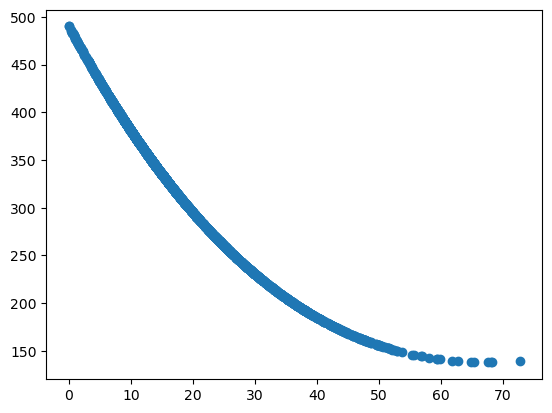

In [83]:
total_emission_CO2_per_km = 0
C = 0.55

km_travelled_per_car = data_2['Mean speed']*data_2['Observed time']/1000
total_km_travelled = km_travelled_per_car.sum()

emissions_per_car_per_km = C* (891 - 22.1360*data_2['Mean speed']*3.6 + 0.2346*(data_2['Mean speed']*3.6)**2  -0.0007*(data_2['Mean speed']*3.6)**3)
emission_per_car = emissions_per_car_per_km*km_travelled_per_car

total_emission = emission_per_car.sum()

emission_per_km = total_emission/total_km_travelled

print(total_emission) #gCO2
print(total_km_travelled) # km
print(emission_per_km) #gCO2/km

emissions_per_car_per_km = emissions_per_car_per_km.to_numpy()
data3 = np.transpose(np.array([3.6*data_2['Mean speed'].to_numpy(), emissions_per_car_per_km]))
data3 = data3[data3[:, 1].argsort()]

plt.scatter(data3[:,0], data3[:,1])

data_2["Vehicle type"].value_counts()

## Question 3

In [109]:
e_idle = 0.7
e_acc = 2.8
e_dec = 1.4
e_cruise = 1.8

time_car = data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" :0})*data_2['Observed time']
time_car = time_car.sum()
e_car = data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" :0})*data_2['Accel time']*e_acc + data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" : 0})*data_2['Decel time']*e_dec + data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" : 0})*data_2['Idle time']*e_idle + data_2['Vehicle type'].map({"Car" : 1, "Motorcycle" : 0, "Heavy Vehicle" : 0})*data_2['Cruise time']*e_cruise
tot_e_car= e_car.sum()

time_moto = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 1, "Heavy Vehicle" :0})*data_2['Observed time']
time_moto = time_moto.sum()
e_moto = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" :0})*data_2['Accel time']*e_acc + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" : 0})*data_2['Decel time']*e_dec + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" : 0})*data_2['Idle time']*e_idle + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0.5, "Heavy Vehicle" : 0})*data_2['Cruise time']*e_cruise
tot_e_moto= e_moto.sum()

time_heavy = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" :1})*data_2['Observed time']
time_heavy = time_heavy.sum()
e_heavy = data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" :5})*data_2['Accel time']*e_acc + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" : 5})*data_2['Decel time']*e_dec + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" : 5})*data_2['Idle time']*e_idle + data_2['Vehicle type'].map({"Car" : 0, "Motorcycle" : 0, "Heavy Vehicle" : 5})*data_2['Cruise time']*e_cruise
tot_e_heavy= e_heavy.sum()

print("total time:", time_car, "emission", tot_e_car, "emission rate", tot_e_car/time_car)
print("total time:",time_moto, "emission", tot_e_moto, "emission rate", tot_e_moto/time_moto)
print("total time:", time_heavy, "emission", tot_e_heavy, "emission rate",tot_e_heavy/time_heavy)



total time: 164051.2 emission 223572.20000000007 emission rate 1.362819656302423
total time: 54981.200000000004 emission 40816.17999999992 emission rate 0.7423661178730169
total time: 12059.6 emission 78538.40000000002 emission rate 6.512521144979935
